In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/dataset_full.csv')

In [3]:
data.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


In [5]:
data.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,...,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.00000,88647.000000,88647.000000,88647.000000
mean,2.191343,0.328810,0.113879,1.281781,0.009329,0.205861,0.022133,0.140885,0.002944,0.001015,...,1.136564,2.772412,1.742428,6159.877514,0.506447,0.343903,0.00141,0.002019,0.005482,0.345720
std,1.235636,1.119286,0.657767,1.893929,0.112568,0.954272,0.279652,0.924864,0.087341,0.072653,...,0.895146,1.322999,1.706705,11465.583810,0.499961,0.783892,0.05864,0.063250,0.073841,0.475605
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.00000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,292.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,2029.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,10798.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,20.000000,20.000000,604800.000000,1.000000,17.000000,1.00000,1.000000,1.000000,1.000000


### Checking for null values

In [6]:
features_with_na = [features for features in data.columns if data[features].isnull().sum()>0]
features_with_na

[]

No colunms with null values found.

### Separating Numerical features

In [7]:
num_features = [feature for feature in data.columns if data[feature].dtype != 'O']
num_features

['qty_dot_url',
 'qty_hyphen_url',
 'qty_underline_url',
 'qty_slash_url',
 'qty_questionmark_url',
 'qty_equal_url',
 'qty_at_url',
 'qty_and_url',
 'qty_exclamation_url',
 'qty_space_url',
 'qty_tilde_url',
 'qty_comma_url',
 'qty_plus_url',
 'qty_asterisk_url',
 'qty_hashtag_url',
 'qty_dollar_url',
 'qty_percent_url',
 'qty_tld_url',
 'length_url',
 'qty_dot_domain',
 'qty_hyphen_domain',
 'qty_underline_domain',
 'qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_at_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain',
 'qty_vowels_domain',
 'domain_length',
 'domain_in_ip',
 'server_client_domain',
 'qty_dot_directory',
 'qty_hyphen_directory',
 'qty_underline_directory',
 'qty_slash_directory',
 'qty_questionmark_directory',
 'qty_equal_directory',
 'qty_at_directory',
 'qty_and_dir

### Discrete Features

In [8]:
discrete_feature = [feature for feature in num_features if len(data[feature].unique())<6]
discrete_feature

['qty_underline_domain',
 'qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_at_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain',
 'domain_in_ip',
 'server_client_domain',
 'qty_questionmark_directory',
 'qty_comma_directory',
 'qty_hashtag_directory',
 'qty_slash_file',
 'qty_questionmark_file',
 'qty_equal_file',
 'qty_at_file',
 'qty_and_file',
 'qty_exclamation_file',
 'qty_hashtag_file',
 'qty_dollar_file',
 'qty_space_params',
 'qty_tilde_params',
 'qty_asterisk_params',
 'qty_hashtag_params',
 'qty_dollar_params',
 'tld_present_params',
 'email_in_url',
 'domain_spf',
 'tls_ssl_certificate',
 'url_google_index',
 'domain_google_index',
 'url_shortened',
 'phishing']

In [9]:
len(discrete_feature)

41

In [10]:
cont_feature = [features for features in num_features if features not in discrete_feature]
cont_feature

['qty_dot_url',
 'qty_hyphen_url',
 'qty_underline_url',
 'qty_slash_url',
 'qty_questionmark_url',
 'qty_equal_url',
 'qty_at_url',
 'qty_and_url',
 'qty_exclamation_url',
 'qty_space_url',
 'qty_tilde_url',
 'qty_comma_url',
 'qty_plus_url',
 'qty_asterisk_url',
 'qty_hashtag_url',
 'qty_dollar_url',
 'qty_percent_url',
 'qty_tld_url',
 'length_url',
 'qty_dot_domain',
 'qty_hyphen_domain',
 'qty_vowels_domain',
 'domain_length',
 'qty_dot_directory',
 'qty_hyphen_directory',
 'qty_underline_directory',
 'qty_slash_directory',
 'qty_equal_directory',
 'qty_at_directory',
 'qty_and_directory',
 'qty_exclamation_directory',
 'qty_space_directory',
 'qty_tilde_directory',
 'qty_plus_directory',
 'qty_asterisk_directory',
 'qty_dollar_directory',
 'qty_percent_directory',
 'directory_length',
 'qty_dot_file',
 'qty_hyphen_file',
 'qty_underline_file',
 'qty_space_file',
 'qty_tilde_file',
 'qty_comma_file',
 'qty_plus_file',
 'qty_asterisk_file',
 'qty_percent_file',
 'file_length',
 'qt

In [11]:
len(cont_feature)

71

### Categorical features

In [12]:
cat_features = [features for features in data.columns if data[features].dtype=='O']
cat_features

[]

### Dependent and Independent features split

In [13]:
X = data.iloc[:,:-1]
y= data.iloc[:,-1]

### Balanced Dataset

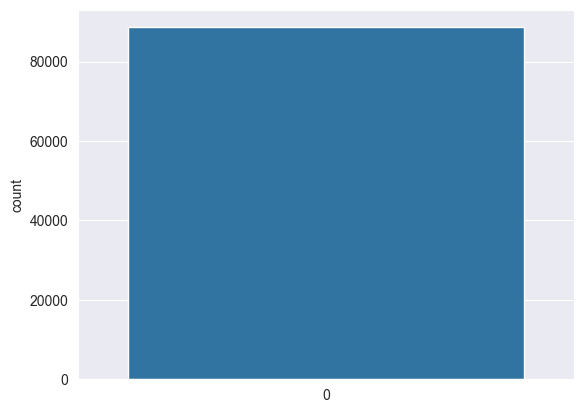

(58000, 112)
(30647, 112)


In [14]:
sns.set_style("darkgrid")
sns.countplot(np.ravel(y))
plt.show()
print(data[data["phishing"]==0].shape)
print(data[data["phishing"]==1].shape)

In [15]:
from imblearn.over_sampling import RandomOverSampler
rdm=RandomOverSampler()
X,y=rdm.fit_resample(X,y)
data=pd.concat([X,y],axis=1)  #updating the balanced form of dataset
print(data[data["phishing"]==0].shape)
print(data[data["phishing"]==1].shape)

(58000, 112)
(58000, 112)


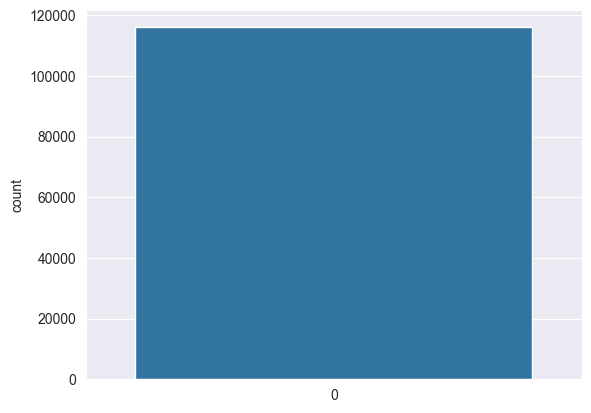

In [16]:
sns.set_style("darkgrid")
sns.countplot(np.ravel(y))
plt.show()

### Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(77720, 111)
(77720,)
(38280, 111)
(38280,)


### Feature Selection

In [18]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostClassifier

In [19]:
estimator = AdaBoostClassifier(random_state=42, n_estimators=50)
selector = SelectFromModel(estimator)
selector = selector.fit(X_train, y_train) 

In [20]:
features = np.array(X_train.columns)
print("All features: {}".format(len(X_train.columns)))
print(features) 

All features: 111
['qty_dot_url' 'qty_hyphen_url' 'qty_underline_url' 'qty_slash_url'
 'qty_questionmark_url' 'qty_equal_url' 'qty_at_url' 'qty_and_url'
 'qty_exclamation_url' 'qty_space_url' 'qty_tilde_url' 'qty_comma_url'
 'qty_plus_url' 'qty_asterisk_url' 'qty_hashtag_url' 'qty_dollar_url'
 'qty_percent_url' 'qty_tld_url' 'length_url' 'qty_dot_domain'
 'qty_hyphen_domain' 'qty_underline_domain' 'qty_slash_domain'
 'qty_questionmark_domain' 'qty_equal_domain' 'qty_at_domain'
 'qty_and_domain' 'qty_exclamation_domain' 'qty_space_domain'
 'qty_tilde_domain' 'qty_comma_domain' 'qty_plus_domain'
 'qty_asterisk_domain' 'qty_hashtag_domain' 'qty_dollar_domain'
 'qty_percent_domain' 'qty_vowels_domain' 'domain_length' 'domain_in_ip'
 'server_client_domain' 'qty_dot_directory' 'qty_hyphen_directory'
 'qty_underline_directory' 'qty_slash_directory'
 'qty_questionmark_directory' 'qty_equal_directory' 'qty_at_directory'
 'qty_and_directory' 'qty_exclamation_directory' 'qty_space_directory'
 'qt

In [21]:
status = selector.get_support()
print("Selected features:".format(len(X_train.columns)))
print(features[status])

Selected features:
['qty_slash_url' 'qty_at_url' 'qty_tld_url' 'length_url' 'qty_dot_domain'
 'qty_hyphen_domain' 'qty_vowels_domain' 'domain_length'
 'qty_hyphen_directory' 'qty_equal_directory' 'qty_dollar_directory'
 'directory_length' 'qty_asterisk_file' 'file_length' 'params_length'
 'time_response' 'domain_spf' 'asn_ip' 'time_domain_activation'
 'qty_ip_resolved' 'qty_nameservers' 'qty_mx_servers' 'ttl_hostname'
 'tls_ssl_certificate' 'url_shortened']


In [22]:
X_train=X_train[features[status]]
X_test=X_test[features[status]]
print(X_train.columns)
print(X_test.columns)

Index(['qty_slash_url', 'qty_at_url', 'qty_tld_url', 'length_url',
       'qty_dot_domain', 'qty_hyphen_domain', 'qty_vowels_domain',
       'domain_length', 'qty_hyphen_directory', 'qty_equal_directory',
       'qty_dollar_directory', 'directory_length', 'qty_asterisk_file',
       'file_length', 'params_length', 'time_response', 'domain_spf', 'asn_ip',
       'time_domain_activation', 'qty_ip_resolved', 'qty_nameservers',
       'qty_mx_servers', 'ttl_hostname', 'tls_ssl_certificate',
       'url_shortened'],
      dtype='object')
Index(['qty_slash_url', 'qty_at_url', 'qty_tld_url', 'length_url',
       'qty_dot_domain', 'qty_hyphen_domain', 'qty_vowels_domain',
       'domain_length', 'qty_hyphen_directory', 'qty_equal_directory',
       'qty_dollar_directory', 'directory_length', 'qty_asterisk_file',
       'file_length', 'params_length', 'time_response', 'domain_spf', 'asn_ip',
       'time_domain_activation', 'qty_ip_resolved', 'qty_nameservers',
       'qty_mx_servers', 'ttl_hos

In [23]:
print(len(X_train.columns),"features selected.")

25 features selected.


### Model

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,roc_auc_score,f1_score,classification_report
from sklearn.metrics import roc_curve, plot_roc_curve
from sklearn.metrics import precision_recall_fscore_support

def model_report(model):
    print(confusion_matrix(y_test,model.predict(X_test)))
    print()
    print(classification_report(y_test,model.predict(X_test)))
    print()
    print('roc_auc_score: ', roc_auc_score(y_test, model.predict(X_test)))
    print()
    print("train set accuracy score :",accuracy_score(y_train,model.predict(X_train)))
    print("test set accuracy score :",  accuracy_score(y_test,model.predict(X_test)))
    print()
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, model.predict(X_test), average='binary')
    p, r, f, _ = precision_recall_fscore_support(y_test, model.predict(X_test), average='binary')
    print('train set precision: ', precision)
    print('test set precision: ', p)
    print()
    print('train set recall: ', recall)
    print('test set recall: ', r)
    print()
    print('train set f1-score: ', f1_score)
    print('test set f1-score: ', f)
    plot_roc_curve(model,X_test,y_test)

In [25]:
def model_pred(model,y_test):
    print()
    y_pred=model.predict(X_test)
    y_pred=pd.DataFrame(y_pred,columns=['Pred'],index=None)
    y_test=np.ravel(y_test)
    y_test=pd.DataFrame(y_test,columns=['Actual'],index=None)
    print(pd.concat([y_test,y_pred], axis=1))

### Logisitic Regression

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()#C=0.5,penalty='l2'

lr_model.fit(X_train,y_train)

LogisticRegression()

[[18039  1310]
 [ 3135 15796]]

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     19349
           1       0.92      0.83      0.88     18931

    accuracy                           0.88     38280
   macro avg       0.89      0.88      0.88     38280
weighted avg       0.89      0.88      0.88     38280


roc_auc_score:  0.8833474240809109

train set accuracy score : 0.8815620174987133
test set accuracy score : 0.8838819226750261

train set precision:  0.9234186835028645
test set precision:  0.9234186835028645

train set recall:  0.8343986054619408
test set recall:  0.8343986054619408

train set f1-score:  0.8766545494908012
test set f1-score:  0.8766545494908012

       Actual  Pred
0           1     1
1           1     1
2           1     1
3           0     0
4           1     0
...       ...   ...
38275       0     0
38276       0     0
38277       1     0
38278       1     1
38279       0     0

[38280 rows x 2 columns]


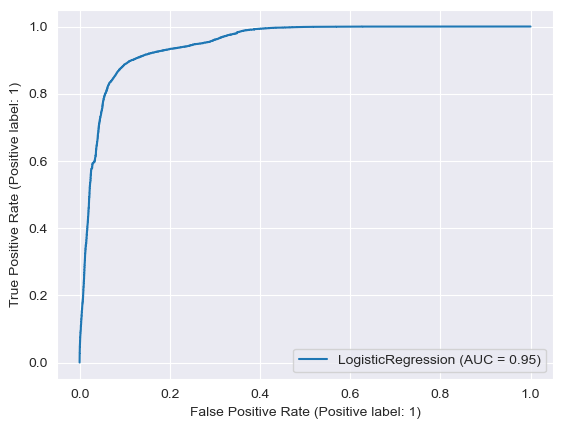

In [27]:
model_report(lr_model)
model_pred(lr_model, y_test)

### Random Forest

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)#criterion= 'gini',max_depth=20, max_features='auto',n_estimators=100,
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

[[18775   574]
 [  248 18683]]

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     19349
           1       0.97      0.99      0.98     18931

    accuracy                           0.98     38280
   macro avg       0.98      0.98      0.98     38280
weighted avg       0.98      0.98      0.98     38280


roc_auc_score:  0.978617089097299

train set accuracy score : 0.9999485331960886
test set accuracy score : 0.9785266457680251

train set precision:  0.970192657215558
test set precision:  0.970192657215558

train set recall:  0.9868997939886958
test set recall:  0.9868997939886958

train set f1-score:  0.9784749135854195
test set f1-score:  0.9784749135854195

       Actual  Pred
0           1     1
1           1     1
2           1     1
3           0     0
4           1     1
...       ...   ...
38275       0     0
38276       0     0
38277       1     1
38278       1     1
38279       0     0

[38280 rows x 2 columns]


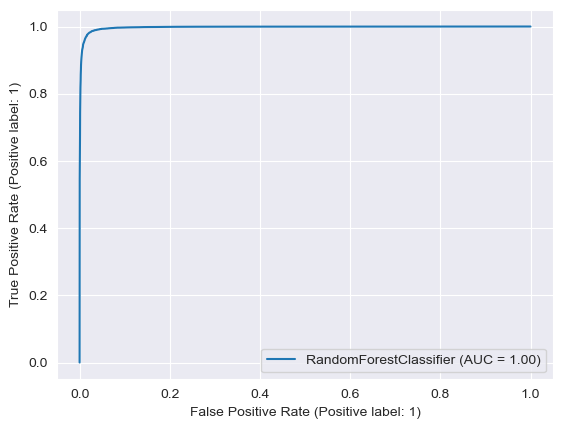

In [29]:
model_report(rf_model)
model_pred(rf_model,y_test)

### Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)#n_estimators=200, learning_rate=0.1, max_depth = 10 ,
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

[[18265  1084]
 [  752 18179]]

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     19349
           1       0.94      0.96      0.95     18931

    accuracy                           0.95     38280
   macro avg       0.95      0.95      0.95     38280
weighted avg       0.95      0.95      0.95     38280


roc_auc_score:  0.9521266137829943

train set accuracy score : 0.953255275347401
test set accuracy score : 0.9520376175548589

train set precision:  0.9437263146965685
test set precision:  0.9437263146965685

train set recall:  0.9602767946754002
test set recall:  0.9602767946754002

train set f1-score:  0.9519296224537886
test set f1-score:  0.9519296224537886

       Actual  Pred
0           1     1
1           1     1
2           1     1
3           0     0
4           1     1
...       ...   ...
38275       0     0
38276       0     0
38277       1     0
38278       1     1
38279       0     0

[38280 rows x 2 columns]


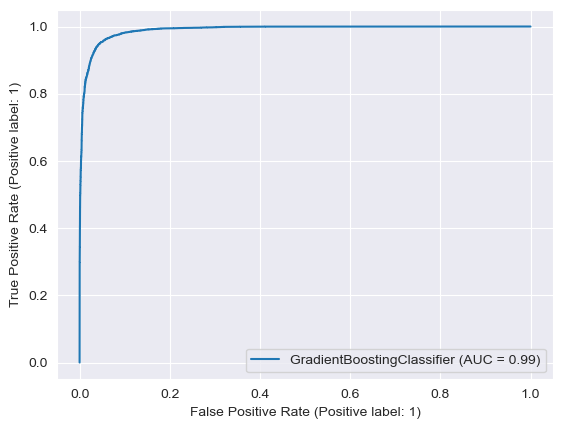

In [31]:
model_report(gb_model)
model_pred(gb_model,y_test)

### XGBoost Classifier

In [32]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)#n_estimators=200, learning_rate=0.1, max_depth=10, 
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

[[18744   605]
 [  459 18472]]

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     19349
           1       0.97      0.98      0.97     18931

    accuracy                           0.97     38280
   macro avg       0.97      0.97      0.97     38280
weighted avg       0.97      0.97      0.97     38280


roc_auc_score:  0.9722431442104056

train set accuracy score : 0.9825141533710756
test set accuracy score : 0.9722048066875653

train set precision:  0.9682864181999267
test set precision:  0.9682864181999267

train set recall:  0.97575405419682
test set recall:  0.97575405419682

train set f1-score:  0.9720058934961061
test set f1-score:  0.9720058934961061

       Actual  Pred
0           1     1
1           1     1
2           1     1
3           0     0
4           1     1
...       ...   ...
38275       0     0
38276       0     0
38277       1     1
38278       1     1
38279       0     0

[38280 rows x 2 columns]


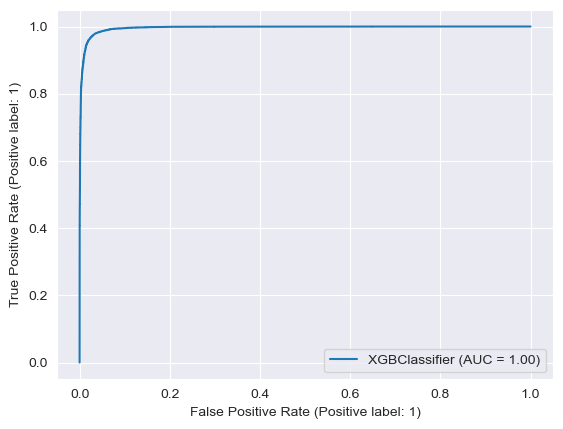

In [33]:
model_report(xgb_model)
model_pred(xgb_model,y_test)

### Test on new data

In [34]:
def report(model):
    print(confusion_matrix(y,model.predict(X)))
    print()
    print(classification_report(y,model.predict(X)))
    print()
    print('roc_auc_score: ', roc_auc_score(y, model.predict(X)))
    print()
    print("test set accuracy score :",  accuracy_score(y,model.predict(X)))
    print()
    p, r, f, _ = precision_recall_fscore_support(y, model.predict(X), average='binary')
    print('test set precision: ', p)
    print()
    print('test set recall: ', r)
    print()
    print('test set f1-score: ', f)
    plot_roc_curve(model,X,y)

In [35]:
df = pd.read_csv("../data/dataset_small.csv")

In [36]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [37]:
X=X[features[status]]

[[24189  3809]
 [ 5096 25551]]

              precision    recall  f1-score   support

           0       0.83      0.86      0.84     27998
           1       0.87      0.83      0.85     30647

    accuracy                           0.85     58645
   macro avg       0.85      0.85      0.85     58645
weighted avg       0.85      0.85      0.85     58645


roc_auc_score:  0.8488370093503106

test set accuracy score : 0.8481541478386905

test set precision:  0.8702656675749318

test set recall:  0.8337194505171795

test set f1-score:  0.851600646591231


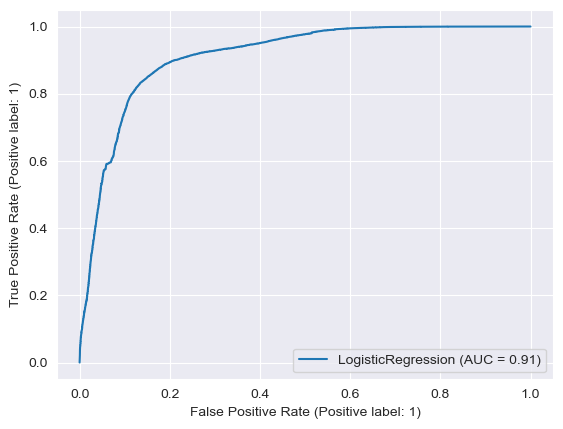

In [39]:
report(lr_model)

[[27434   564]
 [  192 30455]]

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     27998
           1       0.98      0.99      0.99     30647

    accuracy                           0.99     58645
   macro avg       0.99      0.99      0.99     58645
weighted avg       0.99      0.99      0.99     58645


roc_auc_score:  0.9867954083570984

test set accuracy score : 0.9871088754369511

test set precision:  0.9818175956671717

test set recall:  0.9937351127353411

test set f1-score:  0.9877404080044109


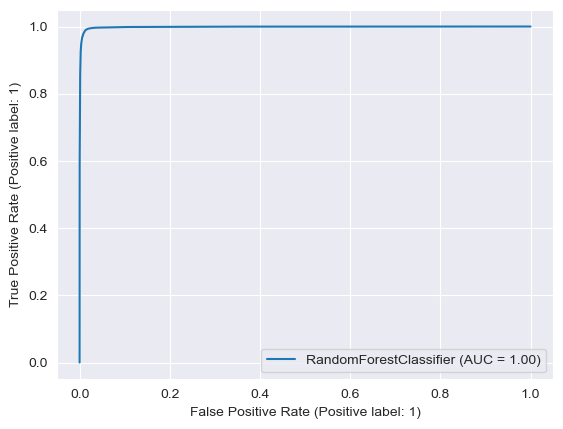

In [40]:
report(rf_model)

[[24773  3225]
 [ 1157 29490]]

              precision    recall  f1-score   support

           0       0.96      0.88      0.92     27998
           1       0.90      0.96      0.93     30647

    accuracy                           0.93     58645
   macro avg       0.93      0.92      0.92     58645
weighted avg       0.93      0.93      0.93     58645


roc_auc_score:  0.9235303646245604

test set accuracy score : 0.9252792224401057

test set precision:  0.901421366345713

test set recall:  0.9622475283061964

test set f1-score:  0.9308418294877056


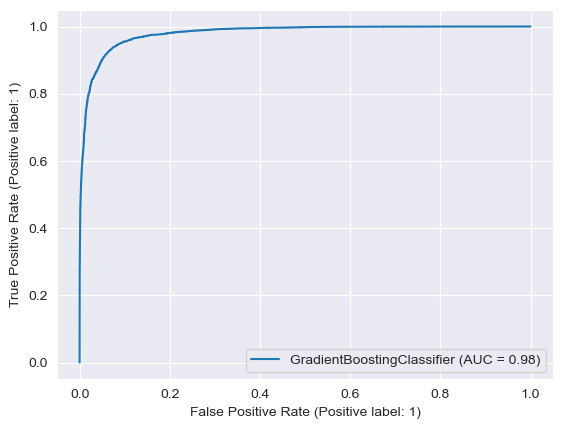

In [41]:
report(gb_model)

[[26644  1354]
 [  606 30041]]

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     27998
           1       0.96      0.98      0.97     30647

    accuracy                           0.97     58645
   macro avg       0.97      0.97      0.97     58645
weighted avg       0.97      0.97      0.97     58645


roc_auc_score:  0.9659329261927037

test set accuracy score : 0.9665785659476511

test set precision:  0.9568721133938525

test set recall:  0.9802264495709205

test set f1-score:  0.9684084974694561


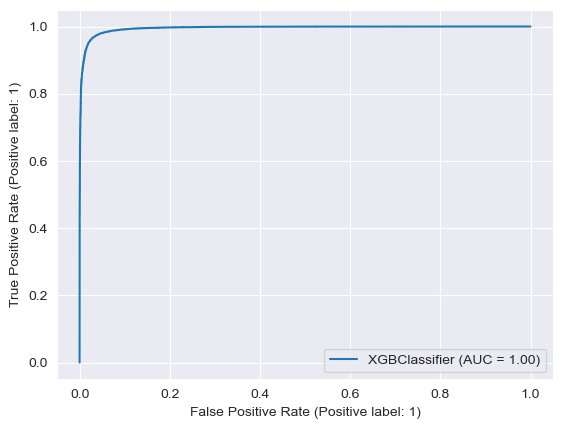

In [42]:
report(xgb_model)

### Download the model

In [44]:
import joblib
joblib.dump(rf_model,"model.joblib")

['model.joblib']